In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df_87 = pd.read_csv('..\\data\\raw\\1987_data.csv', sep=',')

## Objetivo de la exploración: Encontrar correlaciones entre categorías y el target

+ Al tratarse de un dataset en el que todas las columnas son **categóricas**, el uso de **OneHotEncoding/Dumies** no es recomendado en esta fase, dado que generaría 119 columnas
+ Por lo tanto, analizaré las **features** de manera separada.

In [4]:
lista_columnas = df_87.columns.to_list()
lista_columnas

['class',
 'cap-shape',
 'cap-surface',
 'cap-color',
 'bruises',
 'odor',
 'gill-attachment',
 'gill-spacing',
 'gill-size',
 'gill-color',
 'stalk-shape',
 'stalk-root',
 'stalk-surface-above-ring',
 'stalk-surface-below-ring',
 'stalk-color-above-ring',
 'stalk-color-below-ring',
 'veil-type',
 'veil-color',
 'ring-number',
 'ring-type',
 'spore-print-color',
 'population',
 'habitat']

In [12]:

categorical_columns = lista_columnas[1:]
df_target = df_87[['class']]

In [15]:
from sklearn.preprocessing import LabelEncoder

In [20]:
df_target['class'] = LabelEncoder().fit_transform(df_target['class'])

C:\Users\hugom\AppData\Local\Temp\ipykernel_35148\3390505708.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_target['class'] = LabelEncoder().fit_transform(df_target['class'])


In [21]:
df_target

,class
0,1
1,0
2,0
3,1
4,0
...,...
8119,0
8120,0
8121,0
8122,1


In [22]:
# Iterate through each categorical column and create individual DataFrames
for column in categorical_columns:
    # Perform one-hot encoding for the current column
    df_encoded = pd.get_dummies(df_87[column], prefix=column).astype(int)
    
    # Concatenate the target column with the one-hot encoded values
    df_combined = pd.concat([df_target, df_encoded], axis=1)
    
    # Create a variable name for the new DataFrame dynamically
    new_df_name = f"{column}_data"
    
    # Assign the new DataFrame to a dynamically named variable
    globals()[new_df_name] = df_combined

In [23]:
habitat_data

,class,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,1,0,0,0,0,0,1,0
1,0,0,1,0,0,0,0,0
2,0,0,0,0,1,0,0,0
3,1,0,0,0,0,0,1,0
4,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...
8119,0,0,0,1,0,0,0,0
8120,0,0,0,1,0,0,0,0
8121,0,0,0,1,0,0,0,0
8122,1,0,0,1,0,0,0,0


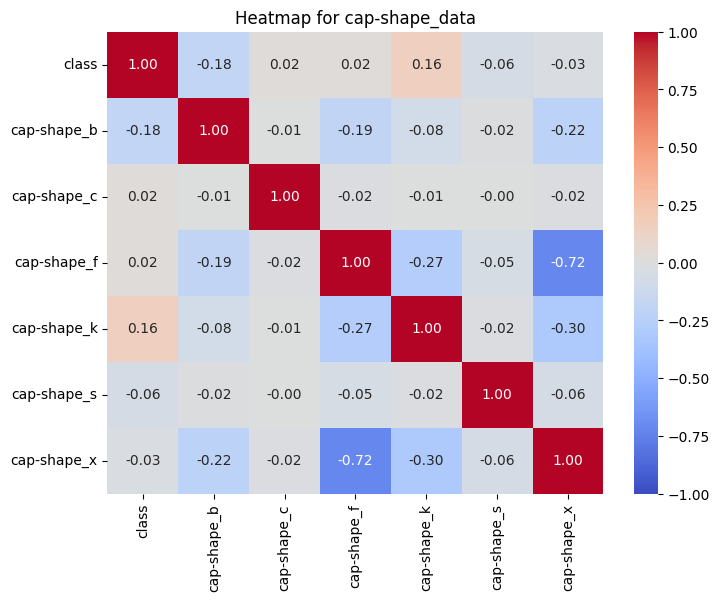

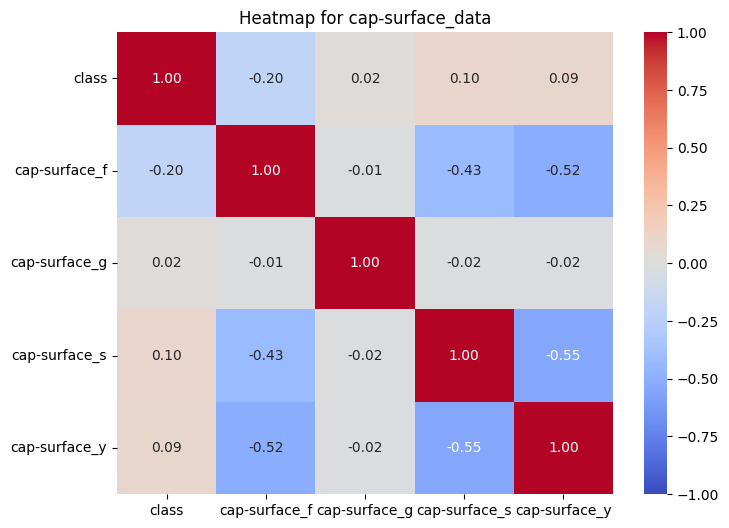

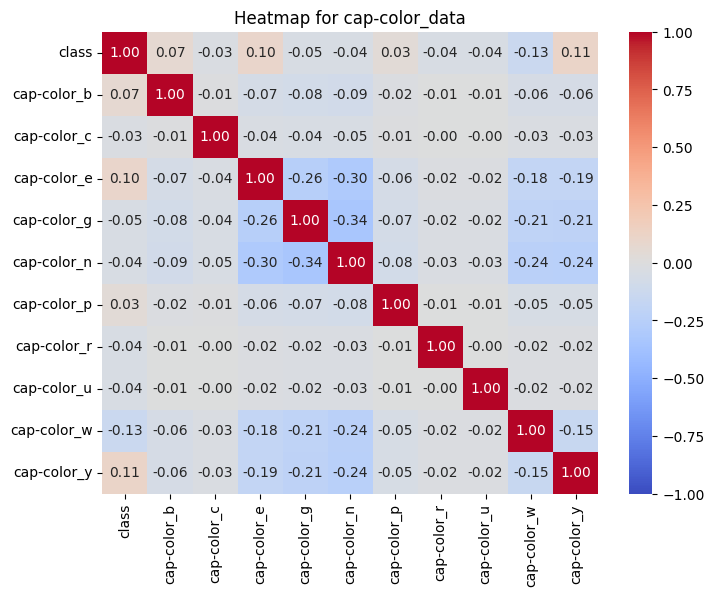

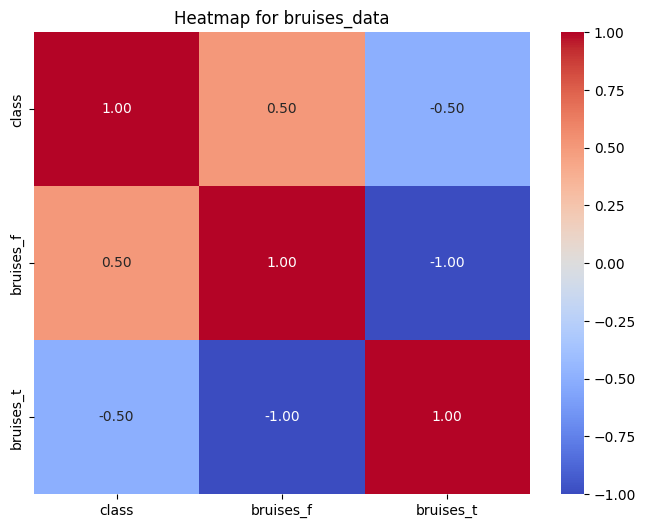

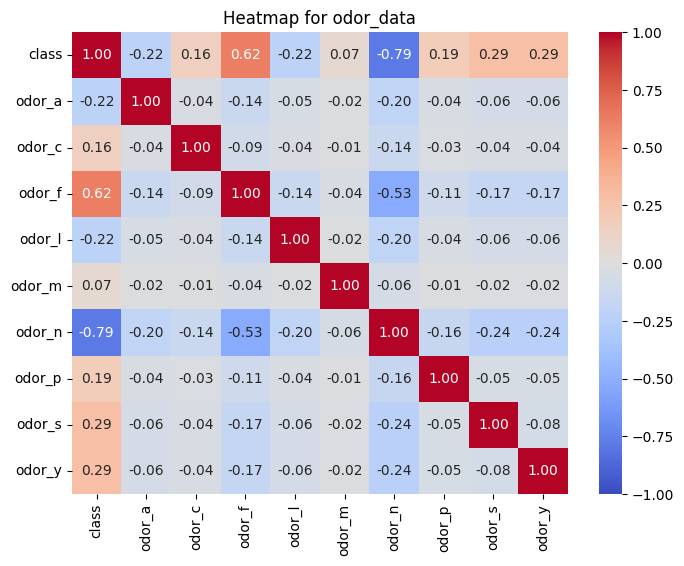

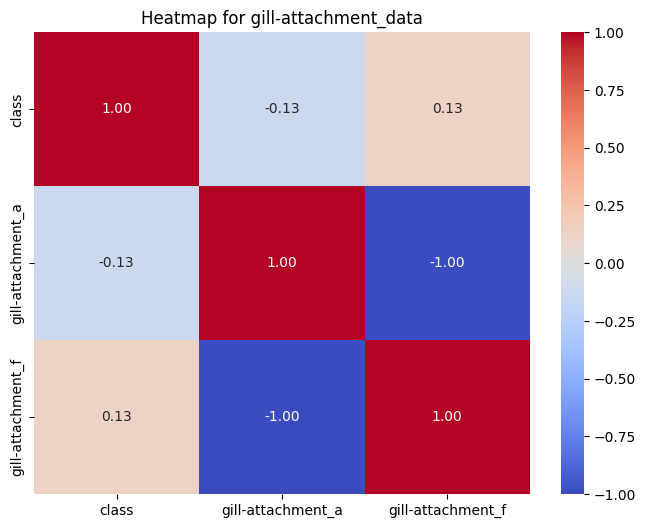

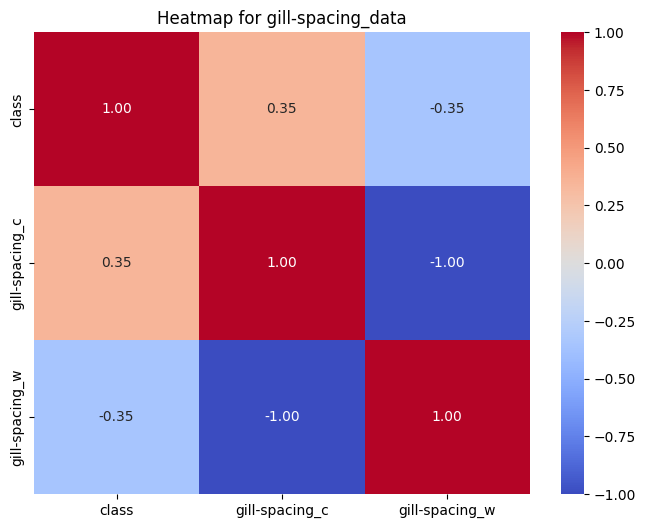

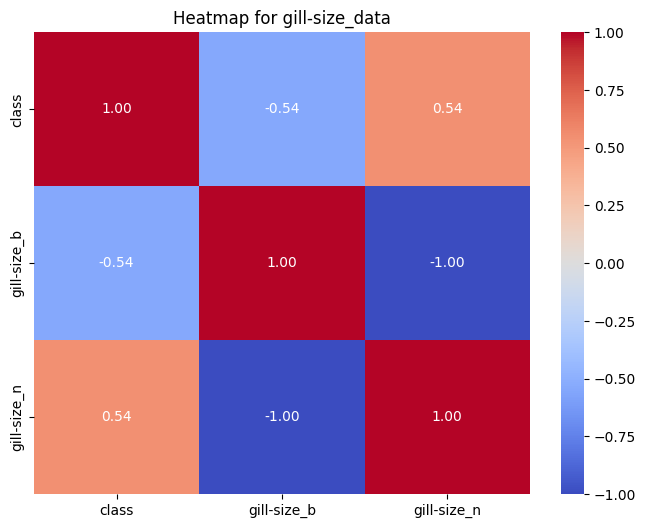

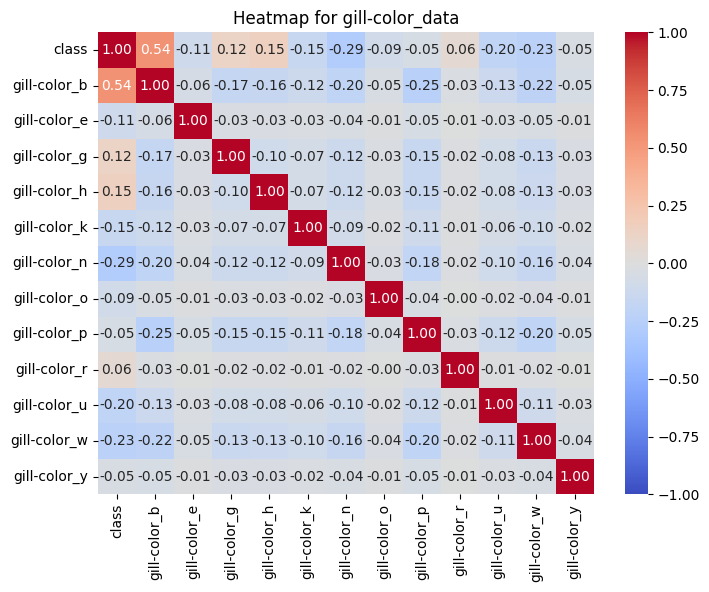

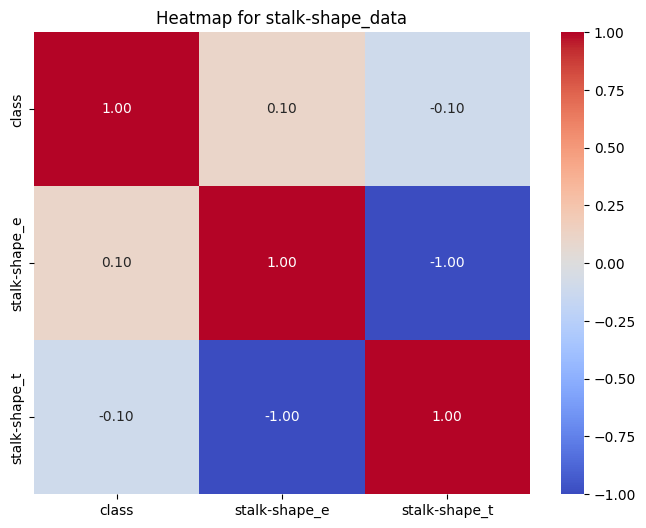

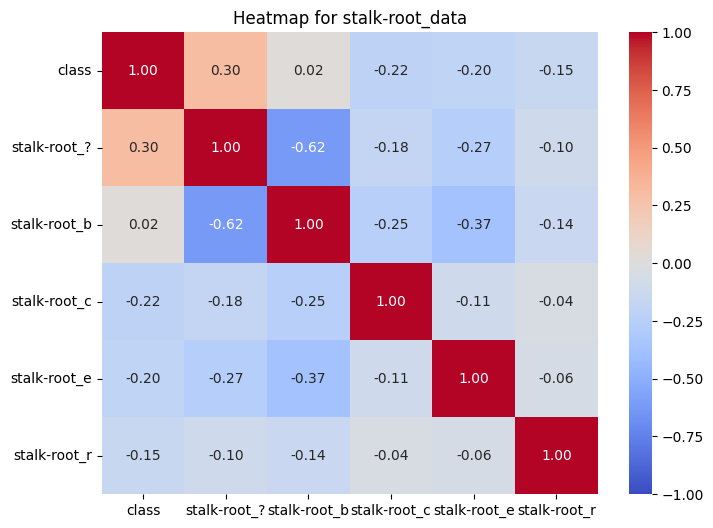

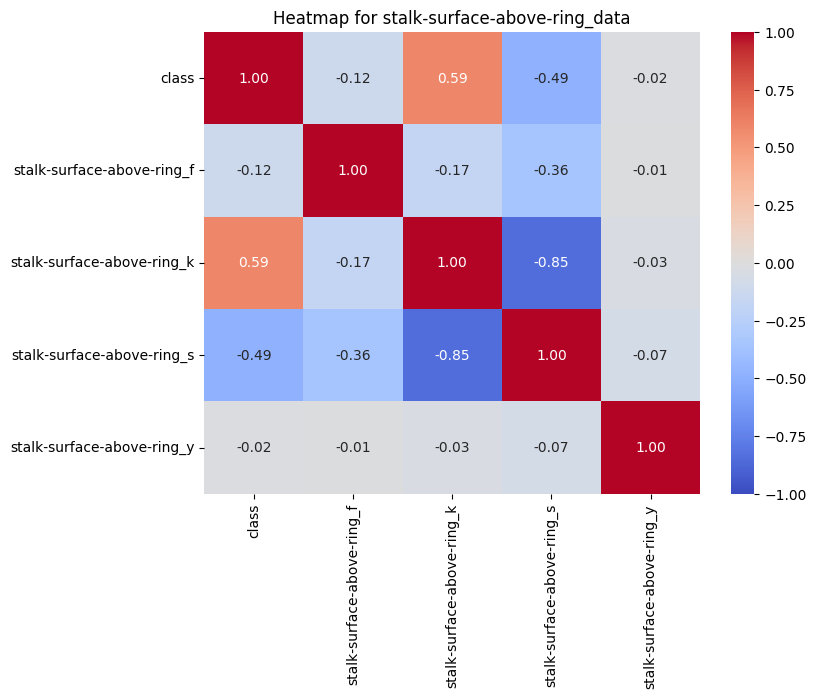

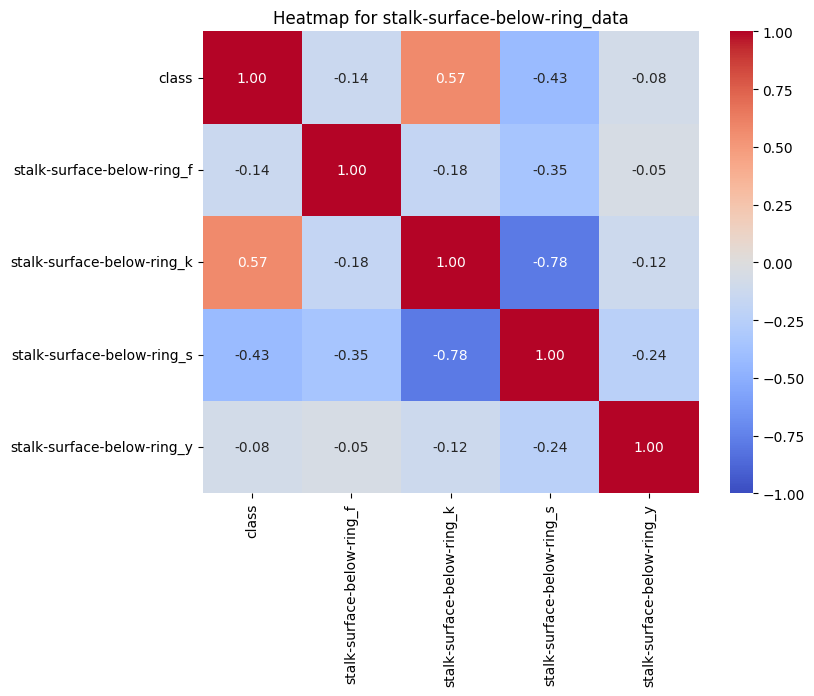

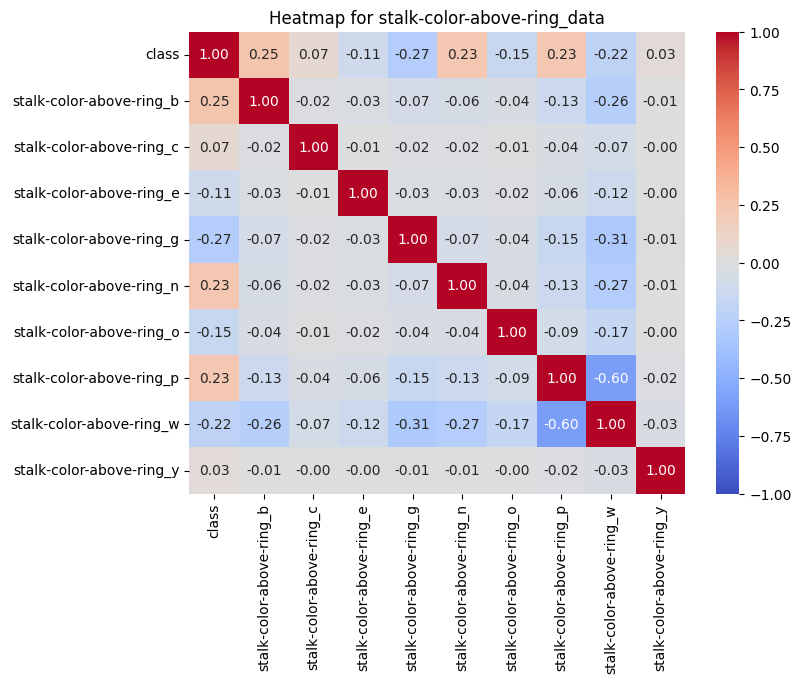

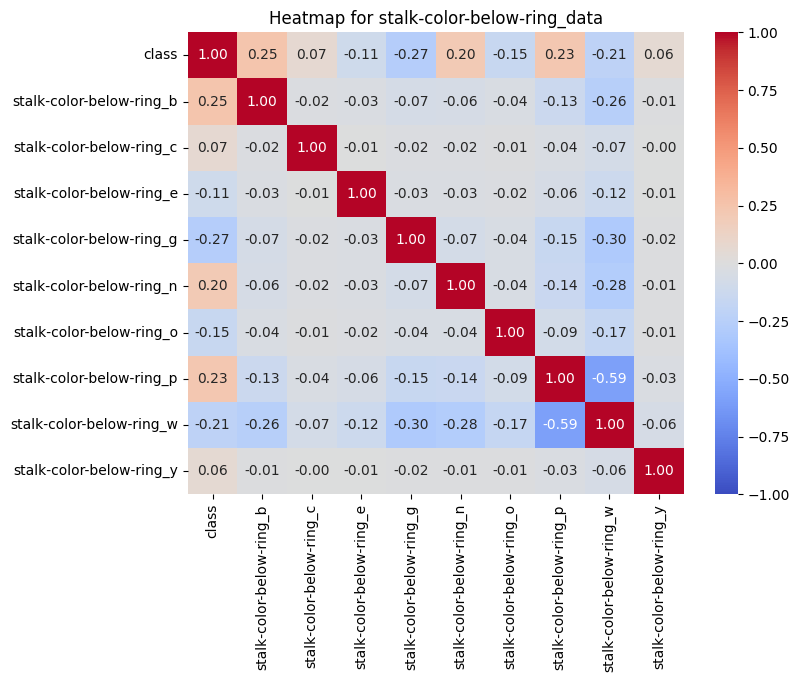

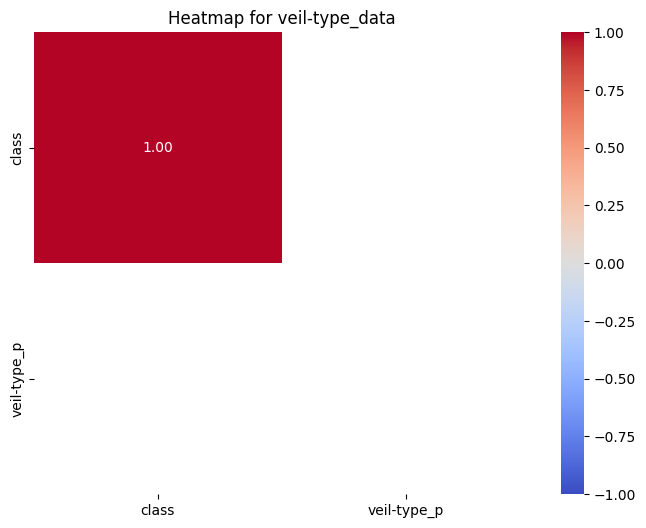

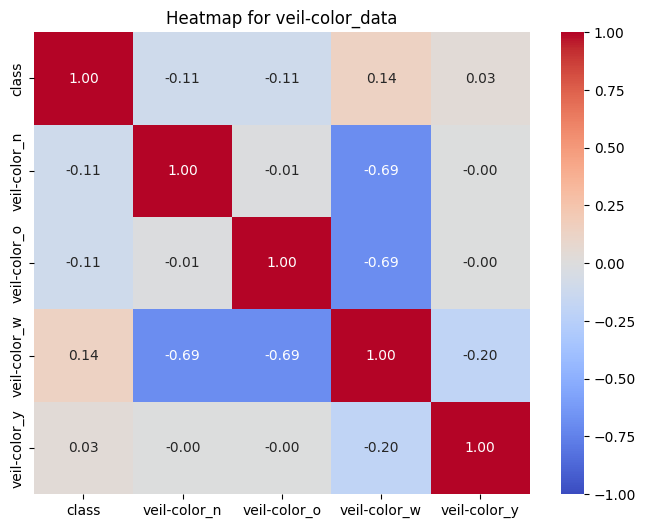

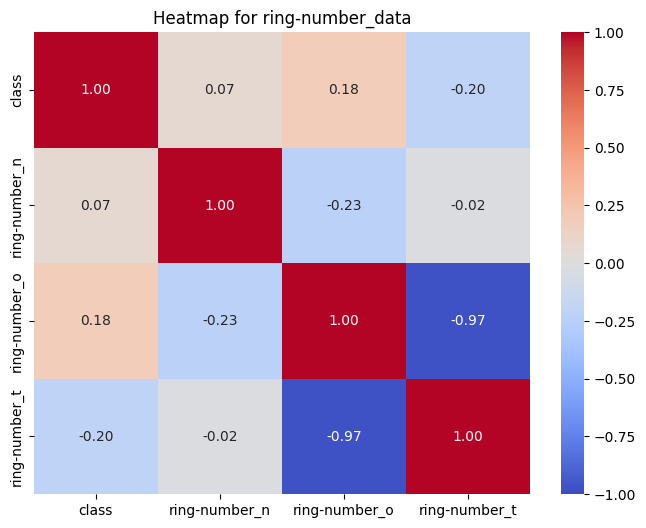

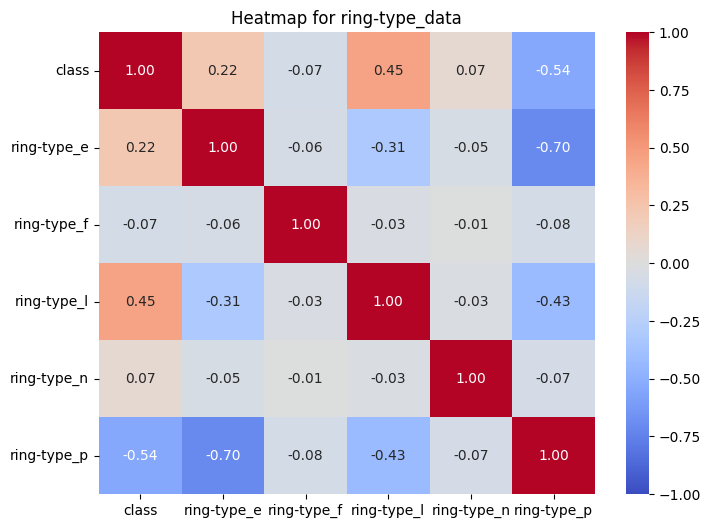

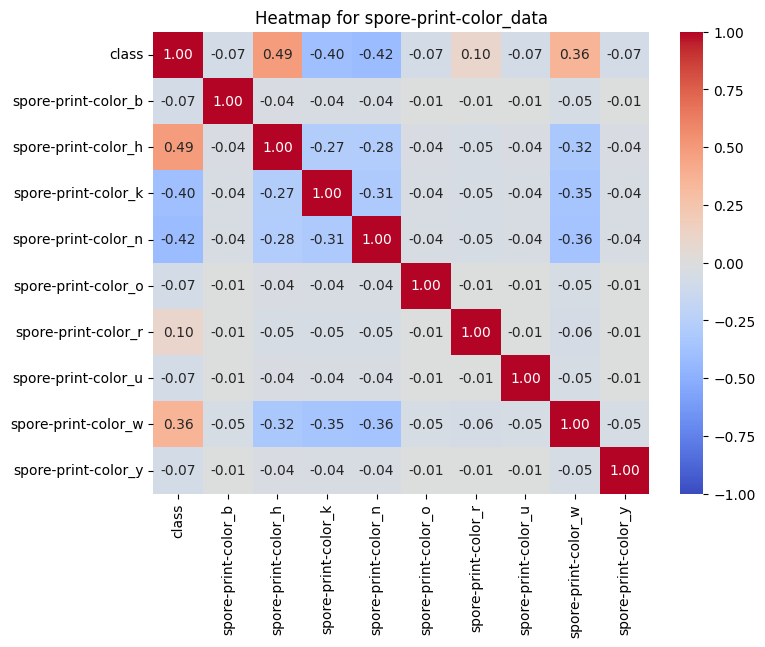

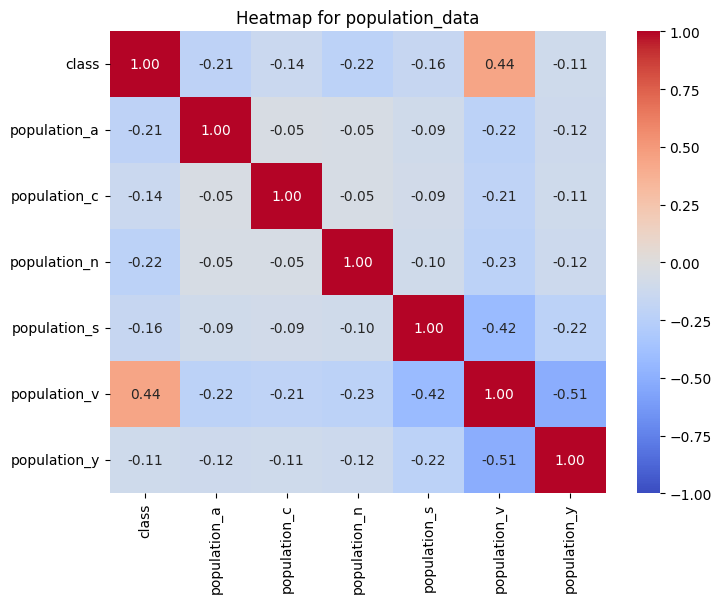

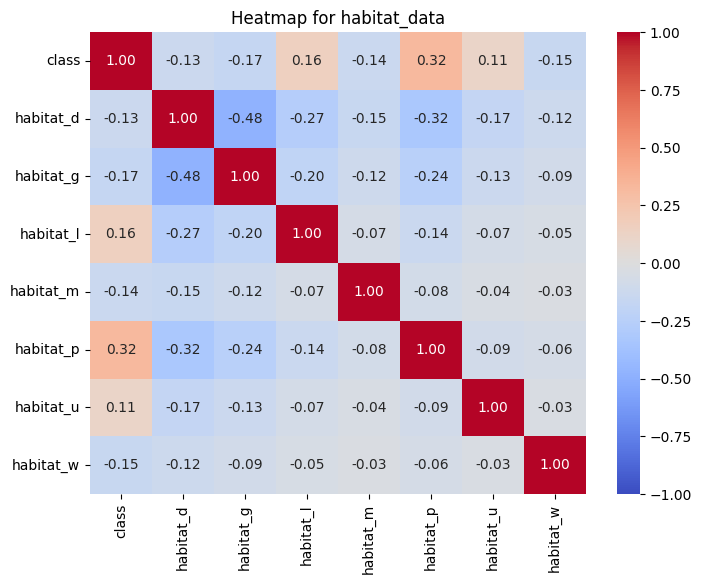

In [30]:
for column in categorical_columns:
    # Assuming DataFrames are named following the pattern 'column_data'
    df_name = f"{column}_data"
    
    # Plot the heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(globals()[df_name].corr(), annot=True, cmap='coolwarm', fmt=".2f",vmin=-1,vmax=1)
    plt.title(f"Heatmap for {df_name}")
    plt.show()

In [31]:
lista_df_parametros=[]

for column in categorical_columns:
          
    # Create a variable name for the new DataFrame dynamically
    new_df_name = f"{column}_data"

    lista_df_parametros.append(new_df_name)

In [32]:
lista_df_parametros

['cap-shape_data',
 'cap-surface_data',
 'cap-color_data',
 'bruises_data',
 'odor_data',
 'gill-attachment_data',
 'gill-spacing_data',
 'gill-size_data',
 'gill-color_data',
 'stalk-shape_data',
 'stalk-root_data',
 'stalk-surface-above-ring_data',
 'stalk-surface-below-ring_data',
 'stalk-color-above-ring_data',
 'stalk-color-below-ring_data',
 'veil-type_data',
 'veil-color_data',
 'ring-number_data',
 'ring-type_data',
 'spore-print-color_data',
 'population_data',
 'habitat_data']

In [41]:
habitat_data.corr()['class']

class        1.000000
habitat_d   -0.126123
habitat_g   -0.165004
habitat_l    0.155150
habitat_m   -0.138627
habitat_p    0.323346
habitat_u    0.112078
habitat_w   -0.150087
Name: class, dtype: float64

In [43]:
highest_correlations = {}

for df in lista_df_parametros:
    # Compute the correlation matrix
    correlation_matrix = globals()[df].corr()['class']

    correlation_matrix = correlation_matrix[correlation_matrix.index != 'class']
    
    # Store the correlation values in a dictionary
    highest_correlations[df] = correlation_matrix

# Concatenate correlation matrices into a single DataFrame
correlation_df = pd.DataFrame(highest_correlations)

# Find the highest correlation values
highest_correlations = correlation_df.abs().max()

In [64]:
highest_correlations

cap-shape_data                   0.182567
cap-surface_data                 0.195415
cap-color_data                   0.133683
bruises_data                     0.501530
odor_data                        0.785557
gill-attachment_data             0.129200
gill-spacing_data                0.348387
gill-size_data                   0.540024
gill-color_data                  0.538808
stalk-shape_data                 0.102019
stalk-root_data                  0.302001
stalk-surface-above-ring_data    0.587658
stalk-surface-below-ring_data    0.573524
stalk-color-above-ring_data      0.266489
stalk-color-below-ring_data      0.266489
veil-type_data                        NaN
veil-color_data                  0.140541
ring-number_data                 0.204600
ring-type_data                   0.540469
spore-print-color_data           0.490229
population_data                  0.443722
habitat_data                     0.323346
dtype: float64

In [53]:

highest_correlations2 = {}

for df in lista_df_parametros:
    # Compute the correlation matrix
    correlation_matrix2 = globals()[df].corr()['class']
    
    # Exclude the correlation of the target with itself
    correlation_matrix2 = correlation_matrix2[correlation_matrix2.index != 'class']
    
    # Find the highest correlation value and its column name
    max_corr_value = correlation_matrix2.abs().max()
    max_corr_column = correlation_matrix2.abs().idxmax()

    # Store the highest correlation value and its column name in the dictionary
    highest_correlations2[df] = {'max_corr_value': max_corr_value, 'max_corr_column': max_corr_column}

# Display the result
for df_name, values in highest_correlations2.items():
    print(f"For DataFrame {df_name}:")
    print(f"Highest Correlation Value: {values['max_corr_value']}")
    print(f"Column with Highest Correlation: {values['max_corr_column']}")
    print()



For DataFrame cap-shape_data:
Highest Correlation Value: 0.1825666895051125
Column with Highest Correlation: cap-shape_b

For DataFrame cap-surface_data:
Highest Correlation Value: 0.19541477669456353
Column with Highest Correlation: cap-surface_f

For DataFrame cap-color_data:
Highest Correlation Value: 0.13368288213884558
Column with Highest Correlation: cap-color_w

For DataFrame bruises_data:
Highest Correlation Value: 0.5015303774075601
Column with Highest Correlation: bruises_t

For DataFrame odor_data:
Highest Correlation Value: 0.7855566222366999
Column with Highest Correlation: odor_n

For DataFrame gill-attachment_data:
Highest Correlation Value: 0.12919986026788371
Column with Highest Correlation: gill-attachment_a

For DataFrame gill-spacing_data:
Highest Correlation Value: 0.348386785184275
Column with Highest Correlation: gill-spacing_w

For DataFrame gill-size_data:
Highest Correlation Value: 0.5400243574330161
Column with Highest Correlation: gill-size_n

For DataFrame 

C:\Users\hugom\AppData\Local\Temp\ipykernel_35148\1523728486.py:12: FutureWarning: The behavior of Series.idxmax with all-NA values, or any-NA and skipna=False, is deprecated. In a future version this will raise ValueError
  max_corr_column = correlation_matrix2.abs().idxmax()


In [52]:
highest_correlations2

{'cap-shape_data': {'max_corr_value': 0.1825666895051125,
  'max_corr_column': 'cap-shape_b'},
 'cap-surface_data': {'max_corr_value': 0.19541477669456353,
  'max_corr_column': 'cap-surface_f'},
 'cap-color_data': {'max_corr_value': 0.13368288213884558,
  'max_corr_column': 'cap-color_w'},
 'bruises_data': {'max_corr_value': 0.5015303774075601,
  'max_corr_column': 'bruises_t'},
 'odor_data': {'max_corr_value': 0.7855566222366999,
  'max_corr_column': 'odor_n'},
 'gill-attachment_data': {'max_corr_value': 0.12919986026788371,
  'max_corr_column': 'gill-attachment_a'},
 'gill-spacing_data': {'max_corr_value': 0.348386785184275,
  'max_corr_column': 'gill-spacing_w'},
 'gill-size_data': {'max_corr_value': 0.5400243574330161,
  'max_corr_column': 'gill-size_n'},
 'gill-color_data': {'max_corr_value': 0.5388081615534445,
  'max_corr_column': 'gill-color_b'},
 'stalk-shape_data': {'max_corr_value': 0.10201901701656099,
  'max_corr_column': 'stalk-shape_e'},
 'stalk-root_data': {'max_corr_va

In [46]:
highest_correlations.sort_values(ascending=False)

odor_data                        0.785557
stalk-surface-above-ring_data    0.587658
stalk-surface-below-ring_data    0.573524
ring-type_data                   0.540469
gill-size_data                   0.540024
gill-color_data                  0.538808
bruises_data                     0.501530
spore-print-color_data           0.490229
population_data                  0.443722
gill-spacing_data                0.348387
habitat_data                     0.323346
stalk-root_data                  0.302001
stalk-color-below-ring_data      0.266489
stalk-color-above-ring_data      0.266489
ring-number_data                 0.204600
cap-surface_data                 0.195415
cap-shape_data                   0.182567
veil-color_data                  0.140541
cap-color_data                   0.133683
gill-attachment_data             0.129200
stalk-shape_data                 0.102019
veil-type_data                        NaN
dtype: float64

In [63]:
total_correlations = {}

# Iterate through each DataFrame
for df in lista_df_parametros:
    # Compute the correlation matrix
    correlation_matrix3 = globals()[df].corr()['class']
    
    # Exclude the correlation of the target with itself
    correlation_matrix3 = correlation_matrix3[correlation_matrix3.index != 'class']
    
    # Update the total_correlations dictionary with the absolute correlation values
    total_correlations.update(correlation_matrix3.abs().to_dict())

# Sort the parameters based on the absolute correlation values
sorted_params = sorted(total_correlations.items(), key=lambda x: x[1], reverse=True)

# Select the top 20 parameters
top_20_params = sorted_params[:20]

# Display the result
for i, (param, value) in enumerate(top_20_params, start=1):
    print(f"{i}. {param}: {value}")

1. odor_n: 0.7855566222366999
2. odor_f: 0.6238419598140379
3. stalk-surface-above-ring_k: 0.5876582576306927
4. stalk-surface-below-ring_k: 0.5735240117095761
5. gill-size_n: 0.5400243574330161
6. gill-size_b: 0.5400243574330158
7. gill-color_b: 0.5388081615534445
8. bruises_t: 0.5015303774075601
9. bruises_f: 0.5015303774075575
10. gill-spacing_w: 0.348386785184275
11. gill-spacing_c: 0.3483867851842734
12. stalk-root_?: 0.3020011029737887
13. gill-color_n: 0.28894290102217096
14. odor_s: 0.2863596480470107
15. odor_y: 0.2863596480470102
16. gill-color_w: 0.2313162223126861
17. odor_l: 0.21952922241349934
18. odor_a: 0.21952922241349918
19. stalk-root_c: 0.21854760016988373
20. stalk-root_e: 0.2028388599834232


In [59]:
sorted_params

[('odor_n', 0.7855566222366999),
 ('odor_f', 0.6238419598140379),
 ('stalk-surface-above-ring_k', 0.5876582576306927),
 ('stalk-surface-below-ring_k', 0.5735240117095761),
 ('gill-size_n', 0.5400243574330161),
 ('gill-size_b', 0.5400243574330158),
 ('gill-color_b', 0.5388081615534445),
 ('bruises_t', 0.5015303774075601),
 ('bruises_f', 0.5015303774075575),
 ('gill-spacing_w', 0.348386785184275),
 ('gill-spacing_c', 0.3483867851842734),
 ('stalk-root_?', 0.3020011029737887),
 ('gill-color_n', 0.28894290102217096),
 ('odor_s', 0.2863596480470107),
 ('odor_y', 0.2863596480470102),
 ('gill-color_w', 0.2313162223126861),
 ('odor_l', 0.21952922241349934),
 ('odor_a', 0.21952922241349918),
 ('stalk-root_c', 0.21854760016988373),
 ('stalk-root_e', 0.2028388599834232),
 ('cap-surface_f', 0.19541477669456353),
 ('gill-color_u', 0.19535917121359506),
 ('odor_p', 0.1869839504781082),
 ('cap-shape_b', 0.1825666895051125),
 ('cap-shape_k', 0.1635650808562086),
 ('odor_c', 0.16127824377950875),
 ('gi

In [60]:
total_correlations

{'cap-shape_b': 0.1825666895051125,
 'cap-shape_c': 0.023007450962256086,
 'cap-shape_f': 0.018525863881447186,
 'cap-shape_k': 0.1635650808562086,
 'cap-shape_s': 0.06066392808019997,
 'cap-shape_x': 0.026885747348740583,
 'cap-surface_f': 0.19541477669456353,
 'cap-surface_g': 0.02300745096225599,
 'cap-surface_s': 0.09545448428229955,
 'cap-surface_y': 0.08867702391665128,
 'cap-color_b': 0.06754404517616519,
 'cap-color_c': 0.030910302793344377,
 'cap-color_e': 0.09711241151696091,
 'cap-color_g': 0.04645578646283912,
 'cap-color_n': 0.04435988270150646,
 'cap-color_p': 0.03470228376929979,
 'cap-color_r': 0.0428535295236856,
 'cap-color_u': 0.042853529523685714,
 'cap-color_w': 0.13368288213884558,
 'cap-color_y': 0.11301388688237962,
 'bruises_f': 0.5015303774075575,
 'bruises_t': 0.5015303774075601,
 'odor_a': 0.21952922241349918,
 'odor_c': 0.16127824377950875,
 'odor_f': 0.6238419598140379,
 'odor_l': 0.21952922241349934,
 'odor_m': 0.06915876083185794,
 'odor_n': 0.7855566222

---
---
---

# Dataset original de 1987 abandonado, por exceso de simpleza a la hora de generar modelos.
### (los modelos tienden a tener una accuracy de 1 con facilidad).

---
---
---


## Tomaré el dataset actualizado del mismo problema.
## Este supone un reto mayor, al estar ante un target multiclase.

In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [19]:
data_class = pd.read_csv('..\\data\\raw\\primary_data_edited.csv', sep=';')

#### El dataset contiene la descripción de 173 especies de setas, con 20 columnas descriptivas. 3 de ellas son numéricas, y el resto categóricas.

#### El target es el nombre de la especie de la seta a clasificar.

In [20]:
data_class.head()

,family,name,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,Spore-print-color,habitat,season
0,Amanita Family,Fly Agaric,p,"[10, 20]","[x, f]","[g, h]","[e, o]",[f],[e],NaN,...,[s],[y],[w],[u],[w],[t],"[g, p]",NaN,[d],"[u, a, w]"
1,Amanita Family,Panther Cap,p,"[5, 10]","[p, x]",[g],[n],[f],[e],NaN,...,NaN,[y],[w],[u],[w],[t],[p],NaN,[d],"[u, a]"
2,Amanita Family,False Panther Cap,p,"[10, 15]","[x, f]",NaN,"[g, n]",[f],[e],NaN,...,NaN,NaN,[w],[u],[w],[t],"[e, g]",NaN,[d],"[u, a]"
3,Amanita Family,The Blusher,e,"[5, 15]","[x, f]",NaN,[n],[t],NaN,NaN,...,[b],NaN,[w],[u],[w],[t],[g],NaN,[d],"[u, a]"
4,Amanita Family,Death Cap,p,"[5, 12]","[x, f]",[h],[r],[f],NaN,[c],...,NaN,NaN,[w],[u],[w],[t],"[g, p]",NaN,[d],"[u, a]"


#### Por restar complejidad al problema, y aumentar la usabilidad del modelo, se eliminan las columnas que corresponden a categorías de difícil identificación.(spore print, gill-attachment, gill-spacing, stem-root, veil-type, ring-type)
#### De la misma manera, la columna de familia y clase(venenosa o no) sobran ya que el target "name" lleva implícitas ambas informaciones.

In [21]:
df = data_class.drop(columns=['family', 'class', 'does-bruise-or-bleed', 'gill-attachment', 'gill-spacing',
        'stem-root', 'veil-type','Spore-print-color'])
df.head(2)

,name,cap-diameter,cap-shape,cap-surface,cap-color,gill-color,stem-height,stem-width,stem-surface,stem-color,veil-color,has-ring,ring-type,habitat,season
0,Fly Agaric,"[10, 20]","[x, f]","[g, h]","[e, o]",[w],"[15, 20]","[15, 20]",[y],[w],[w],[t],"[g, p]",[d],"[u, a, w]"
1,Panther Cap,"[5, 10]","[p, x]",[g],[n],[w],"[6, 10]","[10, 20]",[y],[w],[w],[t],[p],[d],"[u, a]"


#### Las columnas numéricas tienen un rango de valores, que para el modelado se sustituyen por su media.

In [22]:
def calculate_mean(s):
    numbers = pd.Series(eval(s))
    return numbers.mean()

# Apply the function to the specified column
df['cap-diameter'] = df['cap-diameter'].apply(calculate_mean)
df['stem-height'] = df['stem-height'].apply(calculate_mean)
df['stem-width'] = df['stem-width'].apply(calculate_mean)

#### La lectura original del .csv, ha tomado las listas de categorías entre corchetes como strings, y no como listas.

In [23]:
def convert_to_list(value):
    if isinstance(value, str) and value.startswith('[') and value.endswith(']'):
        try:
            return eval(value)
        except (NameError, SyntaxError):
            pass
    return value


df = df.map(convert_to_list)

In [24]:
df.head(2)

,name,cap-diameter,cap-shape,cap-surface,cap-color,gill-color,stem-height,stem-width,stem-surface,stem-color,veil-color,has-ring,ring-type,habitat,season
0,Fly Agaric,15.0,"[x, f]","[g, h]","[e, o]",[w],17.5,17.5,[y],[w],[w],[t],"[g, p]",[d],"[u, a, w]"
1,Panther Cap,7.5,"[p, x]",[g],[n],[w],8.0,15.0,[y],[w],[w],[t],[p],[d],"[u, a]"


Como es observable a simple vista, las columnas categóricas presentan uno o varios valores representados por una letra, dado que existe la posibilidad de que las especies de setas tengan una entre un abanico de posibilidades. Esto da como resultado un reto a la hora de tratar dichas columnas:

+ Habrá que realizar un OneHotEncoding (obtención de dummies) para la multitud de columnas, dado que un LabelEncoder daría una ordenación alfabética que no sería representativo de la correlación real con el target.
+ Para una extracción correcta de dummies, deberán crearse nuevas líneas en el DataFrame, que representen las múltiples combinaciones de todas las categorías existentes.
+ Sólo tras este último paso se podrán obtener los dummies, o las combinaciones posibles de 2 o más categorías serían reconocidas como una categoría en sí misma, lo cual es erróneo.

Para terminar de procesar el DataFrame, separaremos en grupos las columnas, cada cual para un procesamiento específico.

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173 entries, 0 to 172
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          173 non-null    object 
 1   cap-diameter  173 non-null    float64
 2   cap-shape     173 non-null    object 
 3   cap-surface   133 non-null    object 
 4   cap-color     173 non-null    object 
 5   gill-color    173 non-null    object 
 6   stem-height   173 non-null    float64
 7   stem-width    173 non-null    float64
 8   stem-surface  65 non-null     object 
 9   stem-color    173 non-null    object 
 10  veil-color    21 non-null     object 
 11  has-ring      173 non-null    object 
 12  ring-type     166 non-null    object 
 13  habitat       173 non-null    object 
 14  season        173 non-null    object 
dtypes: float64(3), object(12)
memory usage: 20.4+ KB


In [26]:
columns_to_expand = ['cap-shape', 'cap-surface', 'cap-color',
                      'gill-color', 'stem-surface', 'stem-color',
                        'veil-color', 'ring-type', 'habitat', 'season']
columns_to_label = ['has-ring']
columns_numeric = ['cap-diameter','stem-height', 'stem-width']

columns_target = ['name']

In [27]:
from sklearn.preprocessing import LabelEncoder

In [28]:
#Esta función codificará las columnas de categoría binaria.
label_encoder = LabelEncoder()
def encode_columns(df, columns_to_label):
    for column in columns_to_label:
        if column in df.columns:
            df[column] = label_encoder.fit_transform(df[column])
    return df

In [29]:
df = encode_columns(df.copy(), columns_to_label)

In [30]:
#Esta función expande las columnas, hasta obtener igual cantidad de filas como de combinaciones posibles de las categorías.

def expand_rows_for_columns(df, columns_to_expand):
    expanded_df = df.copy()

    for column in columns_to_expand:
        expanded_rows = []

        for _, row in expanded_df.iterrows():
            values_list = str(row[column]).strip('[]').split(',')
            for value in values_list:
                new_row = row.copy()
                new_row[column] = value
                expanded_rows.append(new_row)

        expanded_df = pd.DataFrame(expanded_rows).reset_index(drop=True)

    return expanded_df

In [31]:
df = expand_rows_for_columns(df, columns_to_expand)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6525 entries, 0 to 6524
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          6525 non-null   object 
 1   cap-diameter  6525 non-null   float64
 2   cap-shape     6525 non-null   object 
 3   cap-surface   6525 non-null   object 
 4   cap-color     6525 non-null   object 
 5   gill-color    6525 non-null   object 
 6   stem-height   6525 non-null   float64
 7   stem-width    6525 non-null   float64
 8   stem-surface  6525 non-null   object 
 9   stem-color    6525 non-null   object 
 10  veil-color    6525 non-null   object 
 11  has-ring      6525 non-null   int64  
 12  ring-type     6525 non-null   object 
 13  habitat       6525 non-null   object 
 14  season        6525 non-null   object 
dtypes: float64(3), int64(1), object(11)
memory usage: 764.8+ KB


Observamos como de un Dataframe con **173** líneas, hemos pasado a uno con **6525**. Este último es el número de combinaciones de categorías presente en el original.

Pero las diferentes categorías del target, se mantienen por mucho que aparezcan muchas veces más.

In [33]:
df['name'] = label_encoder.fit_transform(df['name'])

In [34]:
df['name'].nunique()

173

In [35]:
df.shape

(6525, 15)

Por último, se extraen los dummies de las columnas categóricas para su correcto modelado.

In [36]:
df_to_encode = df[columns_to_expand]

onehot_encoder = OneHotEncoder()

df_encoded = pd.DataFrame(onehot_encoder.fit_transform(df_to_encode).toarray(), columns=onehot_encoder.get_feature_names_out(columns_to_expand))

df_result = pd.concat([df, df_encoded], axis=1)

df_result = df_result.drop(columns=columns_to_expand)

In [37]:
df_result.shape

(6525, 166)

In [38]:
df_result.to_csv('..\\data\\procesed\\df_def.csv')